In [1]:
import pyforest

In [2]:
cr = pd.read_csv(r'C:\Users\AKSHAY\Downloads\trainRF.csv')
cr

<IPython.core.display.Javascript object>

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
cr.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

In [54]:
cr_train.shape,cr_test.shape

((1600, 20), (400, 20))

In [6]:
train,test= train_test_split(cr,test_size=0.2)

X_train=train.iloc[:,0:-1]
y_train=train.iloc[:,-1]
X_test=test.iloc[:,0:-1]
y_test=test.iloc[:,-1]

In [7]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [8]:
X_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [9]:
(X_train.columns)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [10]:
len(train.columns)

21

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dt=DecisionTreeClassifier()

dt.fit(X_train,y_train)

pred_y=dt.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix,classification_report

In [18]:
con_mat=confusion_matrix(pred_y,y_test)
# This is by our own method
print("This is Confusion Matrix")

This is Confusion Matrix


In [19]:
print(classification_report(y_test,pred_y)) # Must in this Order

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       105
           1       0.82      0.81      0.82       110
           2       0.78      0.77      0.78        90
           3       0.88      0.89      0.89        95

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



In [20]:
dt_2=DecisionTreeClassifier(criterion='entropy')

dt_2.fit(X_train,y_train)

pred_y=dt_2.predict(X_test)

In [21]:
con_mat_entropy=confusion_matrix(pred_y,y_test)
# This is by our own method
print("This is Confusion Matrix")
print(con_mat_entropy)

This is Confusion Matrix
[[101  18   0   0]
 [  4  84  14   0]
 [  0   8  68   9]
 [  0   0   8  86]]


In [22]:
print(classification_report(y_test,pred_y)) # Must in this Order

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       105
           1       0.82      0.76      0.79       110
           2       0.80      0.76      0.78        90
           3       0.91      0.91      0.91        95

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



In [23]:
dt_2=DecisionTreeClassifier(criterion='entropy',class_weight='balanced')

dt_2.fit(X_train,y_train)

pred_y=dt_2.predict(X_test)

In [24]:
con_mat_entropy_balanced=confusion_matrix(pred_y,y_test)
# This is by our own method
print("This is Confusion Matrix")
print(con_mat_entropy_balanced)

This is Confusion Matrix
[[101  18   0   0]
 [  4  84   8   0]
 [  0   8  73   9]
 [  0   0   9  86]]


In [25]:
print(classification_report(y_test,pred_y)) # Must in this Order

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       105
           1       0.88      0.76      0.82       110
           2       0.81      0.81      0.81        90
           3       0.91      0.91      0.91        95

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



In [36]:
dt_2=DecisionTreeClassifier(class_weight='balanced',max_depth=6)

dt_2.fit(X_train,y_train)

pred_y=dt_2.predict(X_test)

In [37]:
con_mat_gini_balanced=confusion_matrix(pred_y,y_test)
# This is by our own method
print("This is Confusion Matrix")
print(con_mat_gini_balanced)

This is Confusion Matrix
[[99 11  0  0]
 [ 6 89  7  0]
 [ 0 10 72  5]
 [ 0  0 11 90]]


In [38]:
print(classification_report(y_test,pred_y)) # Must in this Order

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       105
           1       0.87      0.81      0.84       110
           2       0.83      0.80      0.81        90
           3       0.89      0.95      0.92        95

    accuracy                           0.88       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.88      0.87       400



In [48]:
dt_2=DecisionTreeClassifier(min_samples_split=100,max_depth=6)

dt_2.fit(X_train,y_train)

pred_y=dt_2.predict(X_test)

In [49]:
con_mat_gini_balanced=confusion_matrix(pred_y,y_test)
# This is by our own method
print("This is Confusion Matrix")
print(con_mat_gini_balanced)

This is Confusion Matrix
[[93 16  0  0]
 [12 83 15  0]
 [ 0 11 61  7]
 [ 0  0 14 88]]


In [50]:
print(classification_report(y_test,pred_y)) # Must in this Order

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       105
           1       0.75      0.75      0.75       110
           2       0.77      0.68      0.72        90
           3       0.86      0.93      0.89        95

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



In [51]:
dt_2=DecisionTreeClassifier(class_weight='balanced',min_samples_split=150,max_depth=6)

dt_2.fit(X_train,y_train)

pred_y=dt_2.predict(X_test)

con_mat_gini_balanced=confusion_matrix(pred_y,y_test)
# This is by our own method
print("This is Confusion Matrix")
print(con_mat_gini_balanced)

This is Confusion Matrix
[[97 26  0  0]
 [ 8 71 15  0]
 [ 0 13 54  1]
 [ 0  0 21 94]]


In [52]:
dt_2.feature_importances_

array([0.10246269, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00118356, 0.        , 0.        , 0.        ,
       0.        , 0.02585219, 0.01655601, 0.85394555, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [53]:
feature_imp_df=pd.DataFrame({'Importance':dt_2.feature_importances_ *100,'columns':X_train.columns})
feature_imp_df=feature_imp_df.sort_values(by='Importance',ascending=False)
feature_imp_df

<IPython.core.display.Javascript object>

,Importance,columns
13,85.394555,ram
0,10.246269,battery_power
11,2.585219,px_height
12,1.655601,px_width
6,0.118356,int_memory
18,0.000000,touch_screen
17,0.000000,three_g
16,0.000000,talk_time
15,0.000000,sc_w
14,0.000000,sc_h


In [54]:
feature_imp_df2=pd.DataFrame({'Importance':dt.feature_importances_ *100,'columns':X_train.columns})
feature_imp_df2=feature_imp_df.sort_values(by='Importance',ascending=False)
feature_imp_df2

<IPython.core.display.Javascript object>

,Importance,columns
13,85.394555,ram
0,10.246269,battery_power
11,2.585219,px_height
12,1.655601,px_width
6,0.118356,int_memory
9,0.000000,n_cores
2,0.000000,clock_speed
3,0.000000,dual_sim
4,0.000000,fc
5,0.000000,four_g


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='price_range', ylabel='ram'>

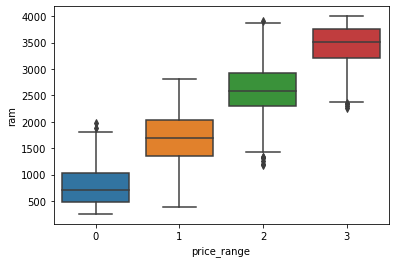

In [55]:
sns.boxplot(x='price_range',y='ram',data=cr)

#### Model in 3 must good 
1. if patient is Pathalogical Model should be good at it
2. by both Oversampling manually,class weight and Model

In [63]:
feature_imp_df2['columns'].values

array(['ram', 'battery_power', 'px_height', 'px_width', 'int_memory',
       'n_cores', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'm_dep',
       'mobile_wt', 'pc', 'blue', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'], dtype=object)

In [64]:
x=list(feature_imp_df2['columns'].values)

y=list(feature_imp_df2['Importance'].values)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

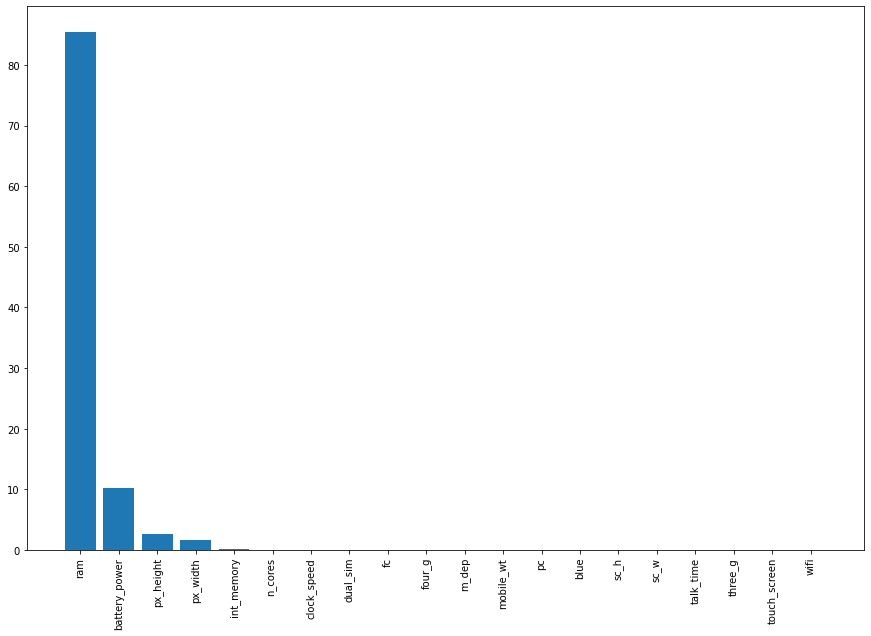

In [75]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
plt.bar(x,y)
plt.show()